# Data Madness: Can we predict if someone can be Gold-Level Athlete based on data?


- What defines the best athletes? What is their nationality, weight, height, and so on? Is there a “perfect” type of person for a discipline?
- Which countries perform best in the Olympic games? Is there a country which performs well for a singular discipline? Is there a country that performs equally good for each discipline?


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## What does our dataset look like?

In [2]:
df=pd.read_csv("data/athlete_events.csv")
empDfObj = pd.DataFrame(df)
dataTypes = empDfObj.dtypes
print(dataTypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


## How many null values are present?

In [3]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


We wanted to choose different kinds of sports to represent for our movie. These sports were chosen based on:

 - How fitting they are for the story
 - How much data is present for the partical kind of sport
 - How interesting we think they would be for the viewer

## How much data is present for the sports?

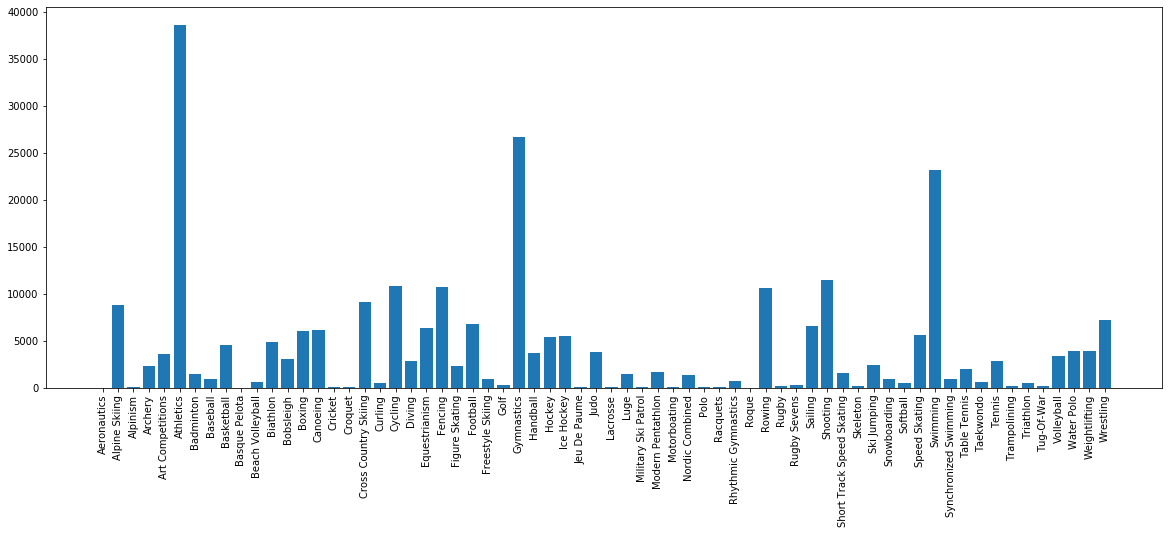

In [4]:
x = []
y = []

for sport, subset in df.groupby('Sport'):
    x.append(sport)
    y.append(subset.shape[0])
    
fig = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90)
plt.bar(x, y)
plt.savefig('images/sportsPopularity.png');

In [5]:
total = df.shape[0]

dfTemp = df[df.Sport == 'Swimming']
temp = dfTemp.shape[0]
print('Swimming has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

dfTemp = df[df.Sport == 'Basketball']
temp = dfTemp.shape[0]
print('Basketball has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

dfTemp = df[df.Sport == 'Cycling']
temp = dfTemp.shape[0]
print('Cycling has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

dfTemp = df[df.Sport == 'Sailing']
temp = dfTemp.shape[0]
print('Sailing has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

dfTemp = df[df.Sport == 'Tennis']
temp = dfTemp.shape[0]
print('Tennis has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

dfTemp = df[df.Sport == 'Rowing']
temp = dfTemp.shape[0]
print('Rowing has ', temp, ' values. This is ', temp * 100/total, '% of the data.')

Swimming has  23195  values. This is  8.555378509567861 % of the data.
Basketball has  4536  values. This is  1.6730845837206214 % of the data.
Cycling has  10859  values. This is  4.005296625798551 % of the data.
Sailing has  6586  values. This is  2.4292184895026483 % of the data.
Tennis has  2862  values. This is  1.0556367016332493 % of the data.
Rowing has  10595  values. This is  3.907921332566134 % of the data.


In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Let's make some dummy variables.

In [7]:
#Deleting ID, Games, Name, City and Event because they do not have any purpose
df.drop(columns= ['ID', 'Games', 'Year', 'Name', 'City', 'Event'], inplace = True)

#Dummy variable: Sex
df['Female'] = 1*(df['Sex'] ==  'F')
df.drop(columns= ['Sex'], inplace = True)

#Dummy variable: NOC
df.drop(columns= ['Team'], inplace = True)
dummy_vars = pd.get_dummies(df[['NOC']])
df = df.join(dummy_vars)
df.drop(columns= ['NOC'], inplace = True)

#Dummy variable: Sex
df['Summer_Season'] = 1*(df['Season'] ==  'Summer')
df.drop(columns= ['Season'], inplace = True)

#Dummy variable: Medal
df['HasMedal'] = 1 - 1*(pd.isna(df.Medal))
df.drop(columns= ['Medal'], inplace = True)

In [8]:
df.head()

,Age,Height,Weight,Sport,Female,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,NOC_ANT,NOC_ANZ,NOC_ARG,NOC_ARM,NOC_ARU,NOC_ASA,NOC_AUS,NOC_AUT,NOC_AZE,NOC_BAH,NOC_BAN,NOC_BAR,NOC_BDI,NOC_BEL,NOC_BEN,NOC_BER,NOC_BHU,NOC_BIH,NOC_BIZ,NOC_BLR,NOC_BOH,NOC_BOL,NOC_BOT,NOC_BRA,NOC_BRN,NOC_BRU,NOC_BUL,NOC_BUR,NOC_CAF,NOC_CAM,NOC_CAN,NOC_CAY,NOC_CGO,NOC_CHA,NOC_CHI,NOC_CHN,NOC_CIV,NOC_CMR,NOC_COD,...,NOC_SMR,NOC_SOL,NOC_SOM,NOC_SRB,NOC_SRI,NOC_SSD,NOC_STP,NOC_SUD,NOC_SUI,NOC_SUR,NOC_SVK,NOC_SWE,NOC_SWZ,NOC_SYR,NOC_TAN,NOC_TCH,NOC_TGA,NOC_THA,NOC_TJK,NOC_TKM,NOC_TLS,NOC_TOG,NOC_TPE,NOC_TTO,NOC_TUN,NOC_TUR,NOC_TUV,NOC_UAE,NOC_UAR,NOC_UGA,NOC_UKR,NOC_UNK,NOC_URS,NOC_URU,NOC_USA,NOC_UZB,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,Summer_Season,HasMedal
0,24.0,180.0,80.0,Basketball,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,23.0,170.0,60.0,Judo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,24.0,NaN,NaN,Football,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,34.0,NaN,NaN,Tug-Of-War,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,21.0,185.0,82.0,Speed Skating,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### How unbalanced is the data?

In [9]:
medals = df[df.HasMedal == 1].shape[0]

print('From all athletes, ', medals * 100/df.shape[0], '% have a medal.')

From all athletes,  14.673792767671403 % have a medal.


### Let's start to analyse the sports.

In [10]:
#Creating the respective dataframes
dfSwimMedal = df[df.Sport == 'Swimming'][df.HasMedal == 1]
dfSwimNoMedal = df[df.Sport == 'Swimming'][df.HasMedal == 0]

#Creating the respective dataframes
dfCycMedal = df[df.Sport == 'Cycling'][df.HasMedal == 1]
dfCycNoMedal = df[df.Sport == 'Cycling'][df.HasMedal == 0]

#Creating the respective dataframes
dfSailMedal = df[df.Sport == 'Sailing'][df.HasMedal == 1]
dfSailNoMedal = df[df.Sport == 'Sailing'][df.HasMedal == 0]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to ma

### What does the data look like?
#### Let's take a look at age first.

In [11]:
print('Mean Age for Swim Medalists is ', dfSwimMedal.Age.mean(), '.')
print('Mean Age for Swim Non-Medalists is ',dfSwimNoMedal.Age.mean(), '.')
print('\n')

print('Median Age for Swim Medalists is ', dfSwimMedal.Age.median(), '.')
print('Median Age for Swim Non-Medalists is ',dfSwimNoMedal.Age.median(), '.')
print('\n')

print('Mode Age for Swim Medalists is ', dfSwimMedal.Age.mode().values[0], '.')
print('Mode Age for Swim Non-Medalists is ',dfSwimNoMedal.Age.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Age for Cycling Medalists is ', dfCycMedal.Age.mean(), '.')
print('Mean Age for Cycling Non-Medalists is ',dfCycNoMedal.Age.mean(), '.')
print('\n')

print('Median Age for Cycling Medalists is ', dfCycMedal.Age.median(), '.')
print('Median Age for Cycling Non-Medalists is ',dfCycNoMedal.Age.median(), '.')
print('\n')

print('Mode Age for Cycling Medalists is ', dfCycMedal.Age.mode().values[0], '.')
print('Mode Age for Cycling Non-Medalists is ',dfCycNoMedal.Age.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Age for Sail Medalists is ', dfSailMedal.Age.mean(), '.')
print('Mean Age for Sail Non-Medalists is ',dfSailNoMedal.Age.mean(), '.')
print('\n')

print('Median Age for Sail Medalists is ', dfSailMedal.Age.median(), '.')
print('Median Age for Sail Non-Medalists is ',dfSailNoMedal.Age.median(), '.')
print('\n')

print('Mode Age for Sail Medalists is ', dfSailMedal.Age.mode().values[0], '.')
print('Mode Age for Sail Non-Medalists is ',dfSailNoMedal.Age.mode().values[0], '.')

Mean Age for Swim Medalists is  20.923356458539807 .
Mean Age for Swim Non-Medalists is  20.511861128079822 .


Median Age for Swim Medalists is  21.0 .
Median Age for Swim Non-Medalists is  20.0 .


Mode Age for Swim Medalists is  21.0 .
Mode Age for Swim Non-Medalists is  19.0 .




Mean Age for Cycling Medalists is  24.59514170040486 .
Mean Age for Cycling Non-Medalists is  24.798680974737312 .


Median Age for Cycling Medalists is  24.0 .
Median Age for Cycling Non-Medalists is  24.0 .


Mode Age for Cycling Medalists is  23.0 .
Mode Age for Cycling Non-Medalists is  23.0 .




Mean Age for Sail Medalists is  31.804255319148936 .
Mean Age for Sail Non-Medalists is  29.941474834178695 .


Median Age for Sail Medalists is  30.0 .
Median Age for Sail Non-Medalists is  28.0 .


Mode Age for Sail Medalists is  25.0 .
Mode Age for Sail Non-Medalists is  27.0 .


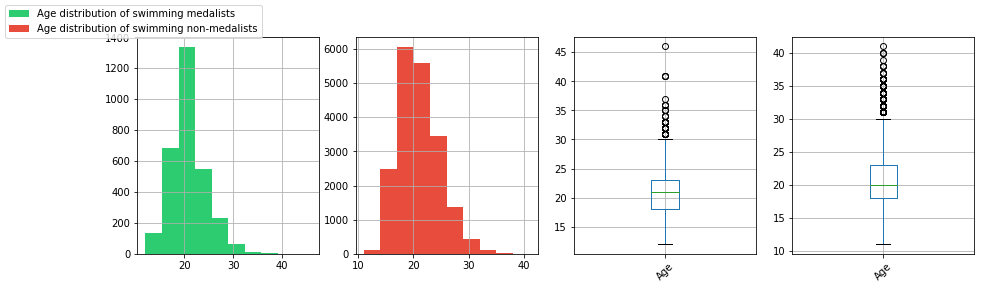

In [12]:
green = [46/255, 204/255, 113/255]
red = [231/255, 76/255, 60/255]

fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSwimMedal.Age.hist(ax = ax[0], label = 'Age distribution of swimming medalists', color = green)
dfSwimNoMedal.Age.hist(ax = ax[1], label = 'Age distribution of swimming non-medalists', color = red)

dfSwimMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[2])
dfSwimNoMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

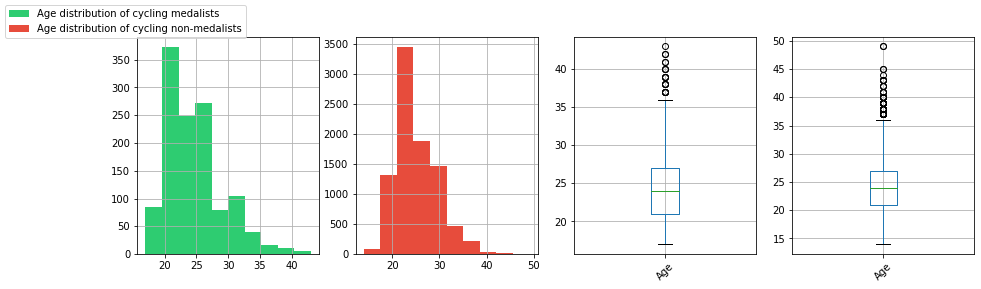

In [13]:
green = [46/255, 204/255, 113/255]
red = [231/255, 76/255, 60/255]

fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfCycMedal.Age.hist(ax = ax[0], label = 'Age distribution of cycling medalists', color = green)
dfCycNoMedal.Age.hist(ax = ax[1], label = 'Age distribution of cycling non-medalists', color = red)

dfCycMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[2])
dfCycNoMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

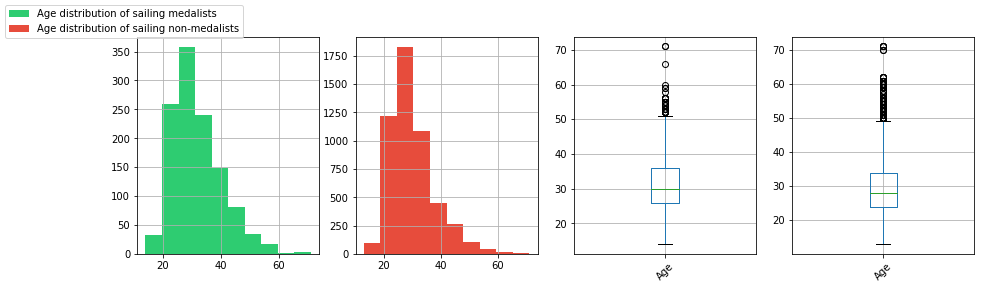

In [14]:
green = [46/255, 204/255, 113/255]
red = [231/255, 76/255, 60/255]

fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSailMedal.Age.hist(ax = ax[0], label = 'Age distribution of sailing medalists', color = green)
dfSailNoMedal.Age.hist(ax = ax[1], label = 'Age distribution of sailing non-medalists', color = red)

dfSailMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[2])
dfSailNoMedal.boxplot(column = 'Age', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

#### Now, let's see the height.

In [15]:
print('Mean Height for swimming Medalists is ', dfSwimMedal.Height.mean(), '.')
print('Mean Height for swimming Non-Medalists is ',dfSwimNoMedal.Height.mean(), '.')
print('\n')
print('Median Height for swimming Medalists is ', dfSwimMedal.Height.median(), '.')
print('Median Height for swimming Non-Medalists is ',dfSwimNoMedal.Height.median(), '.')
print('\n')
print('Mode Height for swimming Medalists is ', dfSwimMedal.Height.mode().values[0], '.')
print('Mode Height for swimming Non-Medalists is ',dfSwimNoMedal.Height.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Height for cycling Medalists is ', dfCycMedal.Height.mean(), '.')
print('Mean Height for cycling Non-Medalists is ',dfCycNoMedal.Height.mean(), '.')
print('\n')
print('Median Height for cycling Medalists is ', dfCycMedal.Height.median(), '.')
print('Median Height for cycling Non-Medalists is ',dfCycNoMedal.Height.median(), '.')
print('\n')
print('Mode Height for cycling Medalists is ', dfCycMedal.Height.mode().values[0], '.')
print('Mode Height for cycling Non-Medalists is ',dfCycNoMedal.Height.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Height for sailing Medalists is ', dfSailMedal.Height.mean(), '.')
print('Mean Height for sailing Non-Medalists is ',dfSailNoMedal.Height.mean(), '.')
print('\n')
print('Median Height for sailing Medalists is ', dfSailMedal.Height.median(), '.')
print('Median Height for sailing Non-Medalists is ',dfSailNoMedal.Height.median(), '.')
print('\n')
print('Mode Height for sailing Medalists is ', dfSailMedal.Height.mode().values[0], '.')
print('Mode Height for sailing Non-Medalists is ',dfSailNoMedal.Height.mode().values[0], '.')

Mean Height for swimming Medalists is  180.92319688109163 .
Mean Height for swimming Non-Medalists is  178.19734700030148 .


Median Height for swimming Medalists is  181.0 .
Median Height for swimming Non-Medalists is  178.0 .


Mode Height for swimming Medalists is  183.0 .
Mode Height for swimming Non-Medalists is  180.0 .




Mean Height for cycling Medalists is  177.69142857142856 .
Mean Height for cycling Non-Medalists is  175.91381495564005 .


Median Height for cycling Medalists is  178.0 .
Median Height for cycling Non-Medalists is  176.0 .


Mode Height for cycling Medalists is  180.0 .
Mode Height for cycling Non-Medalists is  180.0 .




Mean Height for sailing Medalists is  179.34670487106018 .
Mean Height for sailing Non-Medalists is  178.0837066729545 .


Median Height for sailing Medalists is  180.0 .
Median Height for sailing Non-Medalists is  178.0 .


Mode Height for sailing Medalists is  183.0 .
Mode Height for sailing Non-Medalists is  180.0 .


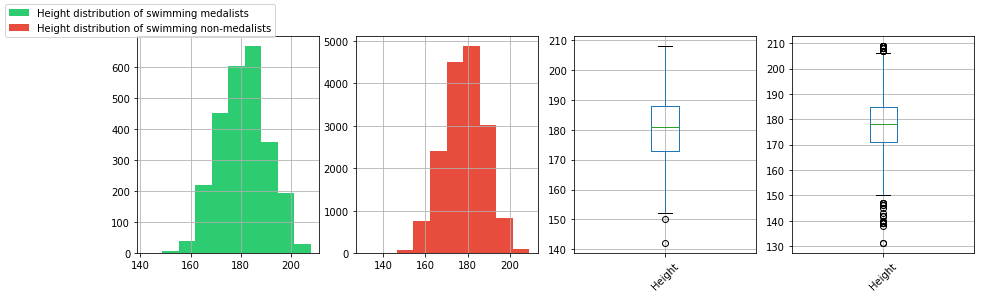

In [16]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSwimMedal.Height.hist(ax = ax[0], label = 'Height distribution of swimming medalists', color = green)
dfSwimNoMedal.Height.hist(ax = ax[1], label = 'Height distribution of swimming non-medalists', color = red)

dfSwimMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[2])
dfSwimNoMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

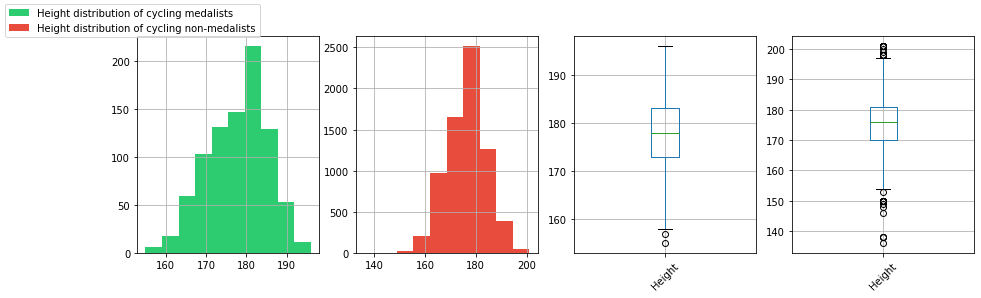

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfCycMedal.Height.hist(ax = ax[0], label = 'Height distribution of cycling medalists', color = green)
dfCycNoMedal.Height.hist(ax = ax[1], label = 'Height distribution of cycling non-medalists', color = red)

dfCycMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[2])
dfCycNoMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

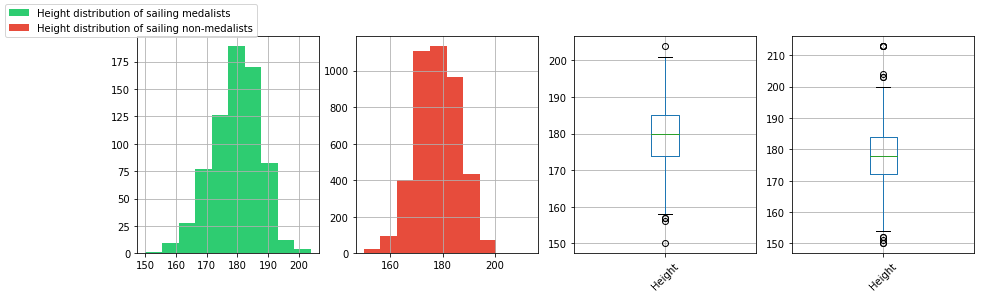

In [18]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSailMedal.Height.hist(ax = ax[0], label = 'Height distribution of sailing medalists', color = green)
dfSailNoMedal.Height.hist(ax = ax[1], label = 'Height distribution of sailing non-medalists', color = red)

dfSailMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[2])
dfSailNoMedal.boxplot(column = 'Height', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

#### What about the weight?

In [19]:
print('Mean Weight for swimming Medalists is ', dfSwimMedal.Weight.mean(), '.')
print('Mean Weight for swimming Non-Medalists is ',dfSwimNoMedal.Weight.mean(), '.')
print('\n')

print('Median Weight for swimming Medalists is ', dfSwimMedal.Weight.median(), '.')
print('Median Weight for swimming Non-Medalists is ',dfSwimNoMedal.Weight.median(), '.')
print('\n')

print('Mode Weight for swimming Medalists is ', dfSwimMedal.Weight.mode().values[0], '.')
print('Mode Weight for swimming Non-Medalists is ',dfSwimNoMedal.Weight.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Weight for cycling Medalists is ', dfCycMedal.Weight.mean(), '.')
print('Mean Weight for cycling Non-Medalists is ',dfCycNoMedal.Weight.mean(), '.')
print('\n')

print('Median Weight for cycling Medalists is ', dfCycMedal.Weight.median(), '.')
print('Median Weight for cycling Non-Medalists is ',dfCycNoMedal.Weight.median(), '.')
print('\n')

print('Mode Weight for cycling Medalists is ', dfCycMedal.Weight.mode().values[0], '.')
print('Mode Weight for cycling Non-Medalists is ',dfCycNoMedal.Weight.mode().values[0], '.')
print('\n')
print('\n')

print('Mean Weight for sailing Medalists is ', dfSailMedal.Weight.mean(), '.')
print('Mean Weight for sailing Non-Medalists is ',dfSailNoMedal.Weight.mean(), '.')
print('\n')

print('Median Weight for sailing Medalists is ', dfSailMedal.Weight.median(), '.')
print('Median Weight for sailing Non-Medalists is ',dfSailNoMedal.Weight.median(), '.')
print('\n')

print('Mode Weight for sailing Medalists is ', dfSailMedal.Weight.mode().values[0], '.')
print('Mode Weight for sailing Non-Medalists is ',dfSailNoMedal.Weight.mode().values[0], '.')

Mean Weight for swimming Medalists is  73.25100482315112 .
Mean Weight for swimming Non-Medalists is  70.1824895807796 .


Median Weight for swimming Medalists is  72.0 .
Median Weight for swimming Non-Medalists is  70.0 .


Mode Weight for swimming Medalists is  70.0 .
Mode Weight for swimming Non-Medalists is  75.0 .




Mean Weight for cycling Medalists is  73.17591499409681 .
Mean Weight for cycling Non-Medalists is  69.69096376915365 .


Median Weight for cycling Medalists is  73.0 .
Median Weight for cycling Non-Medalists is  70.0 .


Mode Weight for cycling Medalists is  75.0 .
Mode Weight for cycling Non-Medalists is  70.0 .




Mean Weight for sailing Medalists is  77.49410029498524 .
Mean Weight for sailing Non-Medalists is  75.72948473282443 .


Median Weight for sailing Medalists is  75.0 .
Median Weight for sailing Non-Medalists is  74.0 .


Mode Weight for sailing Medalists is  70.0 .
Mode Weight for sailing Non-Medalists is  70.0 .


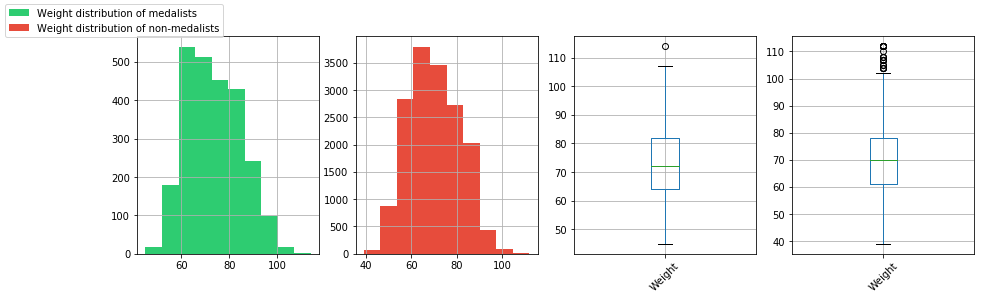

In [20]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSwimMedal.Weight.hist(ax = ax[0], label = 'Weight distribution of medalists', color = green)
dfSwimNoMedal.Weight.hist(ax = ax[1], label = 'Weight distribution of non-medalists', color = red)

dfSwimMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[2])
dfSwimNoMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

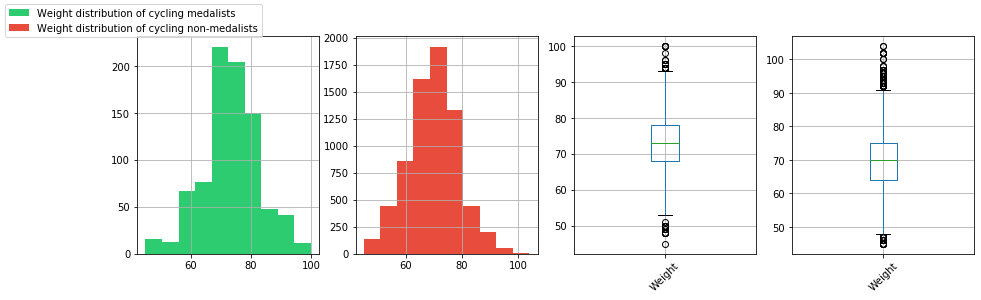

In [21]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfCycMedal.Weight.hist(ax = ax[0], label = 'Weight distribution of cycling medalists', color = green)
dfCycNoMedal.Weight.hist(ax = ax[1], label = 'Weight distribution of cycling non-medalists', color = red)

dfCycMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[2])
dfCycNoMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

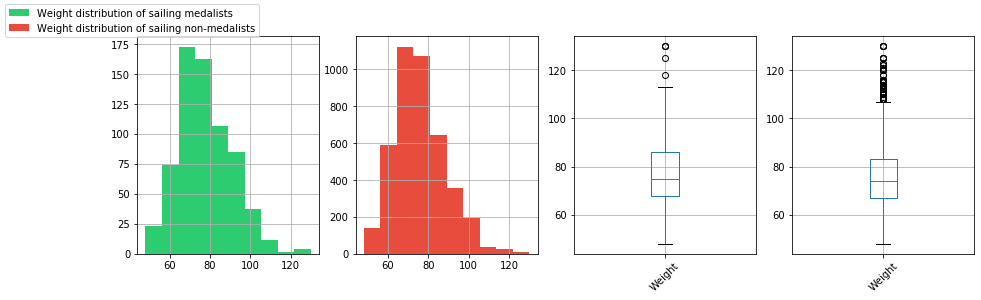

In [22]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))
dfSailMedal.Weight.hist(ax = ax[0], label = 'Weight distribution of sailing medalists', color = green)
dfSailNoMedal.Weight.hist(ax = ax[1], label = 'Weight distribution of sailing non-medalists', color = red)

dfSailMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[2])
dfSailNoMedal.boxplot(column = 'Weight', rot=45, grid=True, ax = ax[3])
fig.legend(loc = 'upper left')

#### Lastly, the gender.

In [23]:
################## NOT RELEVANT, BC GENDERS DON'T COMPETE AGAINST EACH OTHER #####################################
# also I assume that jerry doesn't want to change his gender :D:D

##### Is the data significantly different?

In [24]:
import scipy.stats as scstats
import statsmodels.stats.proportion as stats

stat, p = scstats.ttest_ind(dfSwimMedal.Age, dfSwimNoMedal.Age, nan_policy='omit')
print('P-Value for age is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding age in swimming.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding age in swimming.')
print('\n')
    
stat, p = scstats.ttest_ind(dfSwimMedal.Height, dfSwimNoMedal.Height, nan_policy='omit', equal_var = False)
print('P-Value for height is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding height in swimming.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding height in swimming.')
print('\n')

stat, p = scstats.ttest_ind(dfSwimMedal.Weight, dfSwimNoMedal.Weight, nan_policy='omit')
print('P-Value for weight is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding weight in swimming.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding weight in swimming.')
print('\n')
 
'''
count = np.array([maleMedal, totalMedal])
nobs = np.array([maleNoMedal, totalNoMedal])
stat, p = stats.proportions_ztest(count, nobs)
print('P-Value for gender is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding gender.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding gender.')
'''
print('\n')


stat, p = scstats.ttest_ind(dfCycMedal.Age, dfCycNoMedal.Age, nan_policy='omit')
print('P-Value for age is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding age in cycling.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding age in cycling.')
print('\n')
    
stat, p = scstats.ttest_ind(dfCycMedal.Height, dfCycNoMedal.Height, nan_policy='omit', equal_var = False)
print('P-Value for height is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding height in cycling.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding height in cycling.')
print('\n')

stat, p = scstats.ttest_ind(dfCycMedal.Weight, dfCycNoMedal.Weight, nan_policy='omit')
print('P-Value for weight is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding weight in cycling.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding weight in cycling.')
print('\n')
print('\n')

    
stat, p = scstats.ttest_ind(dfSailMedal.Age, dfSailNoMedal.Age, nan_policy='omit')
print('P-Value for age is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding age in sailing.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding age in sailing.')
print('\n')
    
stat, p = scstats.ttest_ind(dfSailMedal.Height, dfSailNoMedal.Height, nan_policy='omit', equal_var = False)
print('P-Value for height is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding height in sailing.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding height in sailing.')
print('\n')

stat, p = scstats.ttest_ind(dfSailMedal.Weight, dfSailNoMedal.Weight, nan_policy='omit')
print('P-Value for weight is ', p, '.')
if p < 0.05:
    print('Therefore, we reject the hypothesis of equal averages regarding weight in sailing.')
else:
    print('Therefore, we accept the hypothesis of equal averages regarding weight in sailing.')
print('\n')

P-Value for age is  1.706850789567359e-08 .
Therefore, we reject the hypothesis of equal averages regarding age in swimming.


P-Value for height is  1.482296218808536e-38 .
Therefore, we reject the hypothesis of equal averages regarding height in swimming.


P-Value for weight is  1.9127471191806878e-36 .
Therefore, we reject the hypothesis of equal averages regarding weight in swimming.




P-Value for age is  0.12995154756326738 .
Therefore, we accept the hypothesis of equal averages regarding age in cycling.


P-Value for height is  2.7972834988949788e-11 .
Therefore, we reject the hypothesis of equal averages regarding height in cycling.


P-Value for weight is  1.0526104888205363e-25 .
Therefore, we reject the hypothesis of equal averages regarding weight in cycling.




P-Value for age is  5.219978318692083e-13 .
Therefore, we reject the hypothesis of equal averages regarding age in sailing.


P-Value for height is  8.65543107903122e-05 .
Therefore, we reject the hypothesis of e

### Alright, let's make some models!
We need to impute the data first.

In [25]:
trainDf = df.copy()
dummy_vars = pd.get_dummies(trainDf[['Sport']])
trainDf = trainDf.join(dummy_vars)
trainDf.dropna(inplace = True)

dummy_vars = pd.get_dummies(df[['Sport']])
df = df.join(dummy_vars)

##### Age

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

data = trainDf[['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

X_train = data.as_matrix()
y_train = trainDf['Age']

regr.fit(X_train, y_train)
print(regr)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [27]:
missing_index = df.Age[df.Age.isnull()].index
missing_dataframe = df.loc[missing_index, ['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

y_missing_noise = regr.predict(missing_dataframe)

In [28]:
missing_index = df.Age[df.Age.isnull()].index
missing_series = pd.Series(data = y_missing_noise, index = missing_index)
#back to the data set with missingness and impute the predictions
df['Age'] = df['Age'].fillna(missing_series)

##### Imputing the height

In [29]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

data = trainDf[['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

X_train = data.as_matrix()
y_train = trainDf['Height']

regr.fit(X_train, y_train)
print(regr)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
missing_index = df.Height[df.Height.isnull()].index
missing_dataframe = df.loc[missing_index, ['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

y_missing_noise = regr.predict(missing_dataframe)

In [31]:
missing_index = df.Height[df.Height.isnull()].index
missing_series = pd.Series(data = y_missing_noise, index = missing_index)
#back to the data set with missingness and impute the predictions
df['Height'] = df['Height'].fillna(missing_series)

##### Lastly, imputing the weight

In [32]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

data = trainDf[['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

X_train = data.as_matrix()
y_train = trainDf['Weight']

regr.fit(X_train, y_train)
print(regr)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [33]:
missing_index = df.Weight[df.Weight.isnull()].index
missing_dataframe = df.loc[missing_index, ['Female', 'NOC_AFG', 'NOC_AHO',
 'NOC_ALB', 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG',
 'NOC_ARM', 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH',
 'NOC_BAN', 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU',
 'NOC_BIH', 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA',
 'NOC_BRN', 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN',
 'NOC_CAY', 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR',
 'NOC_COD', 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO',
 'NOC_CRT', 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA',
 'NOC_DOM', 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST',
 'NOC_ETH', 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM',
 'NOC_GAB', 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ',
 'NOC_GER', 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM',
 'NOC_GUY', 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND',
 'NOC_IOA', 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV',
 'NOC_ITA', 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN',
 'NOC_KGZ', 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO',
 'NOC_LAT', 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE',
 'NOC_LTU', 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW',
 'NOC_MDA', 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI',
 'NOC_MLT', 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA',
 'NOC_NAM', 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR',
 'NOC_NIG', 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN',
 'NOC_PAR', 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL',
 'NOC_POR', 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU',
 'NOC_RSA', 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN',
 'NOC_SEY', 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL',
 'NOC_SOM', 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI',
 'NOC_SUR', 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH',
 'NOC_TGA', 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE',
 'NOC_TTO', 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA',
 'NOC_UKR', 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN',
 'NOC_VEN', 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
 'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season', 'HasMedal',
 'Sport_Aeronautics', 'Sport_Alpine Skiing', 'Sport_Alpinism',
 'Sport_Archery', 'Sport_Art Competitions', 'Sport_Athletics',
 'Sport_Badminton', 'Sport_Baseball', 'Sport_Basketball',
 'Sport_Basque Pelota', 'Sport_Beach Volleyball', 'Sport_Biathlon',
 'Sport_Bobsleigh', 'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket',
 'Sport_Croquet', 'Sport_Cross Country Skiing', 'Sport_Curling',
 'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
 'Sport_Figure Skating', 'Sport_Football', 'Sport_Freestyle Skiing',
 'Sport_Golf', 'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
 'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo', 'Sport_Lacrosse',
 'Sport_Luge', 'Sport_Military Ski Patrol', 'Sport_Modern Pentathlon',
 'Sport_Motorboating', 'Sport_Nordic Combined', 'Sport_Polo',
 'Sport_Racquets', 'Sport_Rhythmic Gymnastics', 'Sport_Roque', 'Sport_Rowing',
 'Sport_Rugby', 'Sport_Rugby Sevens', 'Sport_Sailing', 'Sport_Shooting',
 'Sport_Short Track Speed Skating', 'Sport_Skeleton', 'Sport_Ski Jumping',
 'Sport_Snowboarding', 'Sport_Softball', 'Sport_Speed Skating',
 'Sport_Swimming', 'Sport_Synchronized Swimming', 'Sport_Table Tennis',
 'Sport_Taekwondo', 'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
 'Sport_Tug-Of-War', 'Sport_Volleyball', 'Sport_Water Polo',
 'Sport_Weightlifting', 'Sport_Wrestling']]

y_missing_noise = regr.predict(missing_dataframe)

In [34]:
missing_index = df.Weight[df.Weight.isnull()].index
missing_series = pd.Series(data = y_missing_noise, index = missing_index)
#back to the data set with missingness and impute the predictions
df['Weight'] = df['Weight'].fillna(missing_series)

All null values imputed?

In [35]:
print(df.isnull().sum().sum())

0


#### Imputing done, let's get the rest rolling.

In [36]:
dfSwim = df[df.Sport == 'Swimming']
dfSwim.drop(columns = ['Sport'], inplace = True)
dfSwim.dropna(inplace = True)

dfCyc = df[df.Sport == 'Cycling']
dfCyc.drop(columns = ['Sport'], inplace = True)
dfCyc.dropna(inplace = True)

dfSail = df[df.Sport == 'Sailing']
dfSail.drop(columns = ['Sport'], inplace = True)
dfSail.dropna(inplace = True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp

#### Model for Swimming

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

itrain, itest = train_test_split(range(dfSwim.shape[0]), test_size=0.25, shuffle = True)

data = dfSwim[['Age', 'Height', 'Weight', 'Female', 'NOC_AFG', 'NOC_AHO', 'NOC_ALB',
 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG', 'NOC_ARM',
 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH', 'NOC_BAN',
 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU', 'NOC_BIH',
 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA', 'NOC_BRN',
 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN', 'NOC_CAY',
 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR', 'NOC_COD',
 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO', 'NOC_CRT',
 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA', 'NOC_DOM',
 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST', 'NOC_ETH',
 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM', 'NOC_GAB',
 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ', 'NOC_GER',
 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM', 'NOC_GUY',
 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND', 'NOC_IOA',
 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV', 'NOC_ITA',
 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN', 'NOC_KGZ',
 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO', 'NOC_LAT',
 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE', 'NOC_LTU',
 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW', 'NOC_MDA',
 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI', 'NOC_MLT',
 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA', 'NOC_NAM',
 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR', 'NOC_NIG',
 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN', 'NOC_PAR',
 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL', 'NOC_POR',
 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU', 'NOC_RSA',
 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN', 'NOC_SEY',
 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL', 'NOC_SOM',
 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI', 'NOC_SUR',
 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH', 'NOC_TGA',
 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE', 'NOC_TTO',
 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA', 'NOC_UKR',
 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN', 'NOC_VEN',
 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM', 'NOC_YMD',
 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season']]

X_train = data.iloc[itrain, :]
X_test = data.iloc[itest, :]
y_train = dfSwim['HasMedal'].iloc[itrain]
y_test = dfSwim['HasMedal'].iloc[itest]

clfSwim = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
#score = roc_auc_score(y_train, l.predict(X_train))
#print("AUROC Score: ", score)
score = roc_auc_score(y_test, clfSwim.predict(X_test))
print("AUROC Score: ", score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC Score:  0.6503762990053262


In [38]:
from sklearn.ensemble import RandomForestClassifier
forestSwim = RandomForestClassifier(max_depth = 100, random_state=1)
forestSwim.fit(X_train, y_train)

score = roc_auc_score(y_test, forestSwim.predict(X_test))
print("AUROC Score: ", score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUROC Score:  0.7649848485566256


In [39]:
from sklearn.linear_model import Lasso
lassoSwim = Lasso(alpha=.0009)
lassoSwim.fit(X_train,y_train)

score = roc_auc_score(y_test, lassoSwim.predict(X_test))
print("AUROC Score: ", score)

AUROC Score:  0.8376365064250858


#### Model for Cycling

In [40]:
itrain, itest = train_test_split(range(dfCyc.shape[0]), test_size=0.25, shuffle = True)

data = dfCyc[['Age', 'Height', 'Weight', 'Female', 'NOC_AFG', 'NOC_AHO', 'NOC_ALB',
 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG', 'NOC_ARM',
 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH', 'NOC_BAN',
 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU', 'NOC_BIH',
 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA', 'NOC_BRN',
 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN', 'NOC_CAY',
 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR', 'NOC_COD',
 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO', 'NOC_CRT',
 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA', 'NOC_DOM',
 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST', 'NOC_ETH',
 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM', 'NOC_GAB',
 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ', 'NOC_GER',
 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM', 'NOC_GUY',
 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND', 'NOC_IOA',
 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV', 'NOC_ITA',
 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN', 'NOC_KGZ',
 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO', 'NOC_LAT',
 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE', 'NOC_LTU',
 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW', 'NOC_MDA',
 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI', 'NOC_MLT',
 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA', 'NOC_NAM',
 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR', 'NOC_NIG',
 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN', 'NOC_PAR',
 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL', 'NOC_POR',
 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU', 'NOC_RSA',
 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN', 'NOC_SEY',
 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL', 'NOC_SOM',
 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI', 'NOC_SUR',
 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH', 'NOC_TGA',
 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE', 'NOC_TTO',
 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA', 'NOC_UKR',
 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN', 'NOC_VEN',
 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM', 'NOC_YMD',
 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season']]

X_train = data.iloc[itrain, :]
X_test = data.iloc[itest, :]
y_train = dfCyc['HasMedal'].iloc[itrain]
y_test = dfCyc['HasMedal'].iloc[itest]

clfCyc = LogisticRegression().fit(X_train, y_train)

score = roc_auc_score(y_test, clfCyc.predict(X_test))
print("AUROC Score: ", score)

AUROC Score:  0.5004175365344468


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
forestCyc = RandomForestClassifier(max_depth = 100, random_state=1)
forestCyc.fit(X_train, y_train)

score = roc_auc_score(y_test, forestCyc.predict(X_test))
print("AUROC Score: ", score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUROC Score:  0.7154912578288101


In [42]:
lassoCyc = Lasso(alpha=.0009)
lassoCyc.fit(X_train,y_train)

score = roc_auc_score(y_test, lassoCyc.predict(X_test))
print("AUROC Score: ", score)

AUROC Score:  0.7640129175365344


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.70755022506916, tolerance: 0.08338093074656182
  positive)


#### Model for Sailing

In [43]:
itrain, itest = train_test_split(range(dfSail.shape[0]), test_size=0.25, shuffle = True)

data = dfSail[['Age', 'Height', 'Weight', 'Female', 'NOC_AFG', 'NOC_AHO', 'NOC_ALB',
 'NOC_ALG', 'NOC_AND', 'NOC_ANG', 'NOC_ANT', 'NOC_ANZ', 'NOC_ARG', 'NOC_ARM',
 'NOC_ARU', 'NOC_ASA', 'NOC_AUS', 'NOC_AUT', 'NOC_AZE', 'NOC_BAH', 'NOC_BAN',
 'NOC_BAR', 'NOC_BDI', 'NOC_BEL', 'NOC_BEN', 'NOC_BER', 'NOC_BHU', 'NOC_BIH',
 'NOC_BIZ', 'NOC_BLR', 'NOC_BOH', 'NOC_BOL', 'NOC_BOT', 'NOC_BRA', 'NOC_BRN',
 'NOC_BRU', 'NOC_BUL', 'NOC_BUR', 'NOC_CAF', 'NOC_CAM', 'NOC_CAN', 'NOC_CAY',
 'NOC_CGO', 'NOC_CHA', 'NOC_CHI', 'NOC_CHN', 'NOC_CIV', 'NOC_CMR', 'NOC_COD',
 'NOC_COK', 'NOC_COL', 'NOC_COM', 'NOC_CPV', 'NOC_CRC', 'NOC_CRO', 'NOC_CRT',
 'NOC_CUB', 'NOC_CYP', 'NOC_CZE', 'NOC_DEN', 'NOC_DJI', 'NOC_DMA', 'NOC_DOM',
 'NOC_ECU', 'NOC_EGY', 'NOC_ERI', 'NOC_ESA', 'NOC_ESP', 'NOC_EST', 'NOC_ETH',
 'NOC_EUN', 'NOC_FIJ', 'NOC_FIN', 'NOC_FRA', 'NOC_FRG', 'NOC_FSM', 'NOC_GAB',
 'NOC_GAM', 'NOC_GBR', 'NOC_GBS', 'NOC_GDR', 'NOC_GEO', 'NOC_GEQ', 'NOC_GER',
 'NOC_GHA', 'NOC_GRE', 'NOC_GRN', 'NOC_GUA', 'NOC_GUI', 'NOC_GUM', 'NOC_GUY',
 'NOC_HAI', 'NOC_HKG', 'NOC_HON', 'NOC_HUN', 'NOC_INA', 'NOC_IND', 'NOC_IOA',
 'NOC_IRI', 'NOC_IRL', 'NOC_IRQ', 'NOC_ISL', 'NOC_ISR', 'NOC_ISV', 'NOC_ITA',
 'NOC_IVB', 'NOC_JAM', 'NOC_JOR', 'NOC_JPN', 'NOC_KAZ', 'NOC_KEN', 'NOC_KGZ',
 'NOC_KIR', 'NOC_KOR', 'NOC_KOS', 'NOC_KSA', 'NOC_KUW', 'NOC_LAO', 'NOC_LAT',
 'NOC_LBA', 'NOC_LBR', 'NOC_LCA', 'NOC_LES', 'NOC_LIB', 'NOC_LIE', 'NOC_LTU',
 'NOC_LUX', 'NOC_MAD', 'NOC_MAL', 'NOC_MAR', 'NOC_MAS', 'NOC_MAW', 'NOC_MDA',
 'NOC_MDV', 'NOC_MEX', 'NOC_MGL', 'NOC_MHL', 'NOC_MKD', 'NOC_MLI', 'NOC_MLT',
 'NOC_MNE', 'NOC_MON', 'NOC_MOZ', 'NOC_MRI', 'NOC_MTN', 'NOC_MYA', 'NOC_NAM',
 'NOC_NBO', 'NOC_NCA', 'NOC_NED', 'NOC_NEP', 'NOC_NFL', 'NOC_NGR', 'NOC_NIG',
 'NOC_NOR', 'NOC_NRU', 'NOC_NZL', 'NOC_OMA', 'NOC_PAK', 'NOC_PAN', 'NOC_PAR',
 'NOC_PER', 'NOC_PHI', 'NOC_PLE', 'NOC_PLW', 'NOC_PNG', 'NOC_POL', 'NOC_POR',
 'NOC_PRK', 'NOC_PUR', 'NOC_QAT', 'NOC_RHO', 'NOC_ROT', 'NOC_ROU', 'NOC_RSA',
 'NOC_RUS', 'NOC_RWA', 'NOC_SAA', 'NOC_SAM', 'NOC_SCG', 'NOC_SEN', 'NOC_SEY',
 'NOC_SGP', 'NOC_SKN', 'NOC_SLE', 'NOC_SLO', 'NOC_SMR', 'NOC_SOL', 'NOC_SOM',
 'NOC_SRB', 'NOC_SRI', 'NOC_SSD', 'NOC_STP', 'NOC_SUD', 'NOC_SUI', 'NOC_SUR',
 'NOC_SVK', 'NOC_SWE', 'NOC_SWZ', 'NOC_SYR', 'NOC_TAN', 'NOC_TCH', 'NOC_TGA',
 'NOC_THA', 'NOC_TJK', 'NOC_TKM', 'NOC_TLS', 'NOC_TOG', 'NOC_TPE', 'NOC_TTO',
 'NOC_TUN', 'NOC_TUR', 'NOC_TUV', 'NOC_UAE', 'NOC_UAR', 'NOC_UGA', 'NOC_UKR',
 'NOC_UNK', 'NOC_URS', 'NOC_URU', 'NOC_USA', 'NOC_UZB', 'NOC_VAN', 'NOC_VEN',
 'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM', 'NOC_YMD',
 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'Summer_Season']]

X_train = data.iloc[itrain, :]
X_test = data.iloc[itest, :]
y_train = dfSail['HasMedal'].iloc[itrain]
y_test = dfSail['HasMedal'].iloc[itest]

clfSail = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

score = roc_auc_score(y_test, clfSail.predict(X_test))
print("AUROC Score: ", score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC Score:  0.5405308092056421


In [44]:
forestSail = RandomForestClassifier(max_depth = 100, random_state=1)
forestSail.fit(X_train, y_train)

score = roc_auc_score(y_test, forestSail.predict(X_test))
print("AUROC Score: ", score)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUROC Score:  0.7325538233110617


In [45]:
lassoSail = Lasso(alpha=.0009)
lassoSail.fit(X_train,y_train)

score = roc_auc_score(y_test, lassoSail.predict(X_test))
print("AUROC Score: ", score)

AUROC Score:  0.7404058401385796


#### How about Jerry's chances of success?

In [46]:
jerryDf = [[0]*data.shape[1]]
#Age
jerryDf[0][0] = 36
#Height in cm
jerryDf[0][1] = 185
#Weight in KG
jerryDf[0][2] = 84
#Country of Origin
jerryDf[0][55] = 1
#Summer_Season
jerryDf[0][234] = 0

print(jerryDf)

[[36, 185, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


##### Swimming

In [47]:
result = forestSwim.predict_proba(jerryDf)
print(result)

[[1. 0.]]


In [48]:
result = lassoSwim.predict(jerryDf)
print(result)

[0.08038647]


###### Cycling

In [49]:
result = forestCyc.predict_proba(jerryDf)
print(result)

[[0.78333333 0.21666667]]


In [50]:
result = lassoCyc.predict(jerryDf)
print(result)

[0.05615815]


###### Sailing

In [51]:
result = forestSail.predict_proba(jerryDf)
print(result)

[[1. 0.]]


In [52]:
result = lassoSail.predict(jerryDf)
print(result)

[0.15048974]
